# Load Data

In [85]:
# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [86]:
import pandas as pd

train_df = pd.read_csv("data/train.csv")
X_train = train_df[[col for col in train_df.columns if col != 'Survived']]
y_train = train_df['Survived']

In [87]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
test_df = pd.read_csv("data/test.csv")
X_test = test_df

In [90]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# X_train Data Preprocessing

## Explore

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Missing values in Age and Cabin, Embarked. Use impute for Age.

In [92]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Age

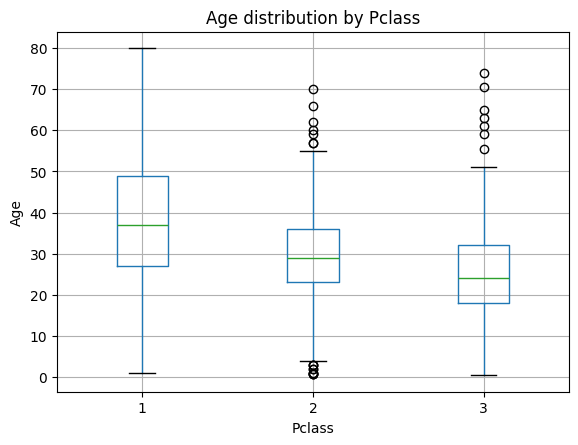

In [93]:
import matplotlib.pyplot as plt

X_train.boxplot(column='Age', by='Pclass')
plt.title('Age distribution by Pclass')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

In [94]:
# Calculate the mean age for each Pclass
mean_age_per_pclass = X_train.groupby('Pclass')['Age'].mean()

# Function to impute age based on Pclass
def impute_age(row):
    if pd.isnull(row['Age']):
        return mean_age_per_pclass[row['Pclass']]
    else:
        return row['Age']

In [95]:
# Calculate the mean age for each Pclass
mean_age_per_pclass = X_train.groupby('Pclass')['Age'].mean()

# Apply the function to the X_train dataframe
X_train['Age'] = X_train.apply(impute_age, axis=1)

# Verify the changes
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


/var/folders/j8/jqyy_gv561l83q_3m1jlxdhw0000gp/T/ipykernel_59764/2467027617.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age'] = X_train.apply(impute_age, axis=1)


### Cabin

In [96]:
X_train["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

Many missing values. Will be dropped for now.

### Embarked

In [97]:
X_train[X_train["Embarked"].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


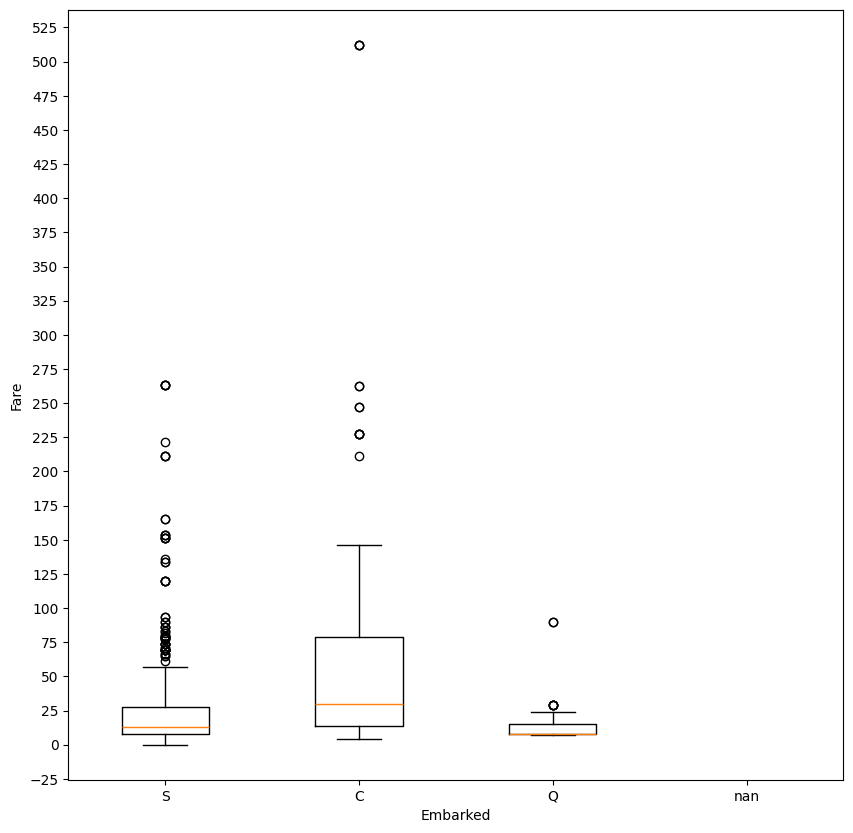

In [98]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot([X_train[X_train['Embarked'] == emb]['Fare'] for emb in X_train['Embarked'].unique()],
           labels=X_train['Embarked'].unique())
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.show()


Embarked C have higher fares. 80 most likely goes along with embarking port c

In [99]:
#Assign the values
X_train.at[61, 'Embarked'] = 'C'
X_train.at[829, 'Embarked'] = 'C'
X_train.iloc[[61, 829], :]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C


In [100]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Name

In [101]:
# List of titles
title_list = ['Master.', 'Count.', 'Countess.', 'Dr.', 'Rev.', 'Capt.', 'Major', 'Lady', 'Oberst']

def flag_titles(name, titles):
    """
    Check if the name contains any of the titles in the list.
    
    Parameters:
    - name: str
        The name to check.
    - titles: list of str
        The list of titles to check against.
        
    Returns:
    - bool
        True if the name contains any of the titles, False otherwise.
    """
    for title in titles:
        if title in name:
            return 1
    return 0

In [102]:
# Apply the function to the DataFrame
X_train['title_flag'] = X_train['Name'].apply(flag_titles, titles=title_list)
X_train.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_flag
713,714,3,"Larsson, Mr. August Viktor",male,29.000000,0,0,7545,9.4833,NaN,S,0
507,508,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,38.233441,0,0,111427,26.5500,NaN,S,0
464,465,3,"Maisner, Mr. Simon",male,25.140620,0,0,A/S 2816,8.0500,NaN,S,0
381,382,3,"Nakid, Miss. Maria (""Mary"")",female,1.000000,0,2,2653,15.7417,NaN,C,0
739,740,3,"Nankoff, Mr. Minko",male,25.140620,0,0,349218,7.8958,NaN,S,0
329,330,1,"Hippach, Miss. Jean Gertrude",female,16.000000,0,1,111361,57.9792,B18,C,0
767,768,3,"Mangan, Miss. Mary",female,30.500000,0,0,364850,7.7500,NaN,Q,0
428,429,3,"Flynn, Mr. James",male,25.140620,0,0,364851,7.7500,NaN,Q,0
95,96,3,"Shorney, Mr. Charles Joseph",male,25.140620,0,0,374910,8.0500,NaN,S,0
513,514,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.000000,1,0,PC 17603,59.4000,NaN,C,0


In [103]:
def split_name(name, n):
    parts = name.split(',')
    return parts[n]

def extract_titles(name):
    parts = name.split('.')
    return parts[0]

def remove_titles(name):
    return name.split('.')[1].strip()

In [104]:
# X_train['last_name'] = X_train['Name'].apply(lambda name: split_name(name, 0))
# X_train['first_name'] = X_train['Name'].apply(lambda name: split_name(name, 1))
# X_train['title'] = X_train['first_name'].apply(extract_titles)
# X_train['first_name'] = X_train['first_name'].apply(remove_titles)
# X_train.sample(10)

## Drop Columns

In [105]:
drop_columns = ['Name', 'Ticket', "Cabin", "PassengerId"]

X_train.drop(columns=drop_columns, inplace=True)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title_flag
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,0
2,3,female,26.0,0,0,7.9250,S,0
3,1,female,35.0,1,0,53.1000,S,0
4,3,male,35.0,0,0,8.0500,S,0


## Encode

fit onehot encoder on X_train
transform X_train
transform X_test, handle_unknown = "ignore"

In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the columns to be encoded
columns_to_encode = ['Sex', 'Embarked']

# Create the encoder
ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), columns_to_encode)], remainder='passthrough')

# Fit and transform the data
X_train = ct.fit_transform(X_train)
X_train

array([[ 0.    ,  1.    ,  0.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 1.    ,  0.    ,  1.    , ...,  0.    , 71.2833,  0.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  2.    , 23.45  ,  0.    ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    , 30.    ,  0.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  7.75  ,  0.    ]])

## Feature Scaling

In [107]:
# Import scaler
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit and transform the data
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.73769513,  0.73769513, -0.48557557, ..., -0.47367361,
        -0.50244517, -0.26629582],
       [ 1.35557354, -1.35557354,  2.05941168, ..., -0.47367361,
         0.78684529, -0.26629582],
       [ 1.35557354, -1.35557354, -0.48557557, ..., -0.47367361,
        -0.48885426, -0.26629582],
       ...,
       [ 1.35557354, -1.35557354, -0.48557557, ...,  2.00893337,
        -0.17626324, -0.26629582],
       [-0.73769513,  0.73769513,  2.05941168, ..., -0.47367361,
        -0.04438104, -0.26629582],
       [-0.73769513,  0.73769513, -0.48557557, ..., -0.47367361,
        -0.49237783, -0.26629582]])

## Rename columns

In [108]:
# # Get the feature names
# feature_names = ct.get_feature_names_out()

# # Clean feature names remainder__
# feature_names = [name.replace('remainder__', '') for name in feature_names]

# # Convert the array back to a DataFrame
# X_train = pd.DataFrame(X_train, columns=feature_names)
# X_train.head()


# X_test Data Preprocessing

## Explore

In [109]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### Age

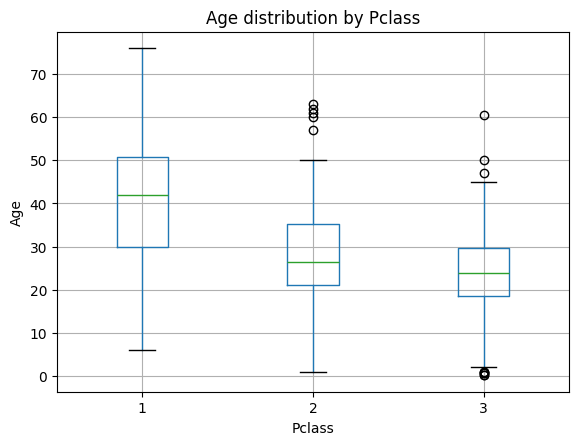

In [110]:
import matplotlib.pyplot as plt

X_test.boxplot(column='Age', by='Pclass')
plt.title('Age distribution by Pclass')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

In [111]:
# Calculate the mean age for each Pclass
mean_age_per_pclass = X_test.groupby('Pclass')['Age'].mean()

# Apply the function to the X_test dataframe
X_test['Age'] = X_test.apply(impute_age, axis=1)

# Verify the changes
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### Fare

In [112]:
X_test[X_test["Fare"].isna()]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [113]:
# Calculate the average Fare for each combination of Pclass and Embarked
avg_fare_per_class_embarked = X_test.groupby(['Pclass', 'Embarked'])['Fare'].mean()

# Function to impute Fare based on Pclass and Embarked
def impute_fare(row):
    if pd.isnull(row['Fare']):
        return avg_fare_per_class_embarked[row['Pclass'], row['Embarked']]
    else:
        return row['Fare']

# Apply the function to the X_test dataframe
X_test['Fare'] = X_test.apply(impute_fare, axis=1)

# Verify the changes
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### Name

In [114]:
# Apply the function to the DataFrame
X_test['title_flag'] = X_test['Name'].apply(flag_titles, titles=title_list)
X_test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_flag
396,1288,3,"Colbert, Mr. Patrick",male,24.000000,0,0,371109,7.2500,NaN,Q,0
380,1272,3,"O'Connor, Mr. Patrick",male,24.027945,0,0,366713,7.7500,NaN,Q,0
44,936,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.000000,1,0,11753,52.5542,D19,S,0
386,1278,3,"Aronsson, Mr. Ernst Axel Algot",male,24.000000,0,0,349911,7.7750,NaN,S,0
255,1147,3,"MacKay, Mr. George William",male,24.027945,0,0,C.A. 42795,7.5500,NaN,S,0
295,1187,3,"Angheloff, Mr. Minko",male,26.000000,0,0,349202,7.8958,NaN,S,0
392,1284,3,"Abbott, Master. Eugene Joseph",male,13.000000,0,2,C.A. 2673,20.2500,NaN,S,1
207,1099,2,"Collett, Mr. Sidney C Stuart",male,24.000000,0,0,28034,10.5000,NaN,S,0
172,1064,3,"Dyker, Mr. Adolf Fredrik",male,23.000000,1,0,347072,13.9000,NaN,S,0
188,1080,3,"Sage, Miss. Ada",female,24.027945,8,2,CA. 2343,69.5500,NaN,S,0


In [115]:
X_test['last_name'] = X_test['Name'].apply(lambda name: split_name(name, 0))
X_test['first_name'] = X_test['Name'].apply(lambda name: split_name(name, 1))
X_test['title'] = X_test['first_name'].apply(extract_titles)
X_test['first_name'] = X_test['first_name'].apply(remove_titles)
X_test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_flag,last_name,first_name,title
242,1134,1,"Spedden, Mr. Frederic Oakley",male,45.000000,1,1,16966,134.5000,E34,C,0,Spedden,Frederic Oakley,Mr
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,24.027945,1,9,CA. 2343,69.5500,NaN,S,0,Sage,John (Annie Bullen),Mrs
293,1185,1,"Dodge, Dr. Washington",male,53.000000,1,1,33638,81.8583,A34,S,1,Dodge,Washington,Dr
376,1268,3,"Kink, Miss. Maria",female,22.000000,2,0,315152,8.6625,NaN,S,0,Kink,Maria,Miss
105,997,3,"Holthen, Mr. Johan Martin",male,28.000000,0,0,C 4001,22.5250,NaN,S,0,Holthen,Johan Martin,Mr
264,1156,2,"Portaluppi, Mr. Emilio Ilario Giuseppe",male,30.000000,0,0,C.A. 34644,12.7375,NaN,C,0,Portaluppi,Emilio Ilario Giuseppe,Mr
250,1142,2,"West, Miss. Barbara J",female,0.920000,1,2,C.A. 34651,27.7500,NaN,S,0,West,Barbara J,Miss
400,1292,1,"Bonnell, Miss. Caroline",female,30.000000,0,0,36928,164.8667,C7,S,0,Bonnell,Caroline,Miss
263,1155,3,"Klasen, Miss. Gertrud Emilia",female,1.000000,1,1,350405,12.1833,NaN,S,0,Klasen,Gertrud Emilia,Miss
214,1106,3,"Andersson, Miss. Ida Augusta Margareta",female,38.000000,4,2,347091,7.7750,NaN,S,0,Andersson,Ida Augusta Margareta,Miss


## Drop Columns

In [116]:
X_test_passenger_ids = X_test['PassengerId']
X_test.drop(columns=drop_columns, inplace=True)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title_flag,last_name,first_name,title
0,3,male,34.5,0,0,7.8292,Q,0,Kelly,James,Mr
1,3,female,47.0,1,0,7.0000,S,0,Wilkes,James (Ellen Needs),Mrs
2,2,male,62.0,0,0,9.6875,Q,0,Myles,Thomas Francis,Mr
3,3,male,27.0,0,0,8.6625,S,0,Wirz,Albert,Mr
4,3,female,22.0,1,1,12.2875,S,0,Hirvonen,Alexander (Helga E Lindqvist),Mrs


## Encode

In [117]:
# Transform the data

X_test = ct.transform(X_test)
X_test

array([[ 0.    ,  1.    ,  0.    , ...,  0.    ,  7.8292,  0.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  7.    ,  0.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  9.6875,  0.    ],
       ...,
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  8.05  ,  0.    ],
       [ 0.    ,  1.    ,  1.    , ...,  1.    , 22.3583,  1.    ]])

## Feature Scaling

In [118]:
# Fit and transform the data
X_test = scaler.fit_transform(X_test)
X_test

array([[-0.75592895,  0.75592895, -0.56814154, ..., -0.4002477 ,
        -0.4973857 , -0.24680702],
       [ 1.32287566, -1.32287566, -0.56814154, ..., -0.4002477 ,
        -0.51225024, -0.24680702],
       [-0.75592895,  0.75592895, -0.56814154, ..., -0.4002477 ,
        -0.46407313, -0.24680702],
       ...,
       [-0.75592895,  0.75592895, -0.56814154, ..., -0.4002477 ,
        -0.50776865, -0.24680702],
       [-0.75592895,  0.75592895, -0.56814154, ..., -0.4002477 ,
        -0.49342755, -0.24680702],
       [-0.75592895,  0.75592895,  1.76012477, ...,  0.61989583,
        -0.23693172,  4.05174859]])

# Classification

In [119]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [120]:
y_pred = classifier.predict(X_test)

In [121]:
import numpy as np
print(y_pred.reshape(len(y_pred),1))

[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]


In [122]:
X_test

array([[-0.75592895,  0.75592895, -0.56814154, ..., -0.4002477 ,
        -0.4973857 , -0.24680702],
       [ 1.32287566, -1.32287566, -0.56814154, ..., -0.4002477 ,
        -0.51225024, -0.24680702],
       [-0.75592895,  0.75592895, -0.56814154, ..., -0.4002477 ,
        -0.46407313, -0.24680702],
       ...,
       [-0.75592895,  0.75592895, -0.56814154, ..., -0.4002477 ,
        -0.50776865, -0.24680702],
       [-0.75592895,  0.75592895, -0.56814154, ..., -0.4002477 ,
        -0.49342755, -0.24680702],
       [-0.75592895,  0.75592895,  1.76012477, ...,  0.61989583,
        -0.23693172,  4.05174859]])

In [125]:
# Create a DataFrame with predictions to save or submit


submission = pd.DataFrame({
    'PassengerId': X_test_passenger_ids,
    'Survived': y_pred
})

submission.to_csv('submission.csv', index=False)